# Data Preprocessing

In [5]:
#!pip install numpy
#!pip install matplotlib
#!pip install pandas

# Importing data

In [6]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
# Importing the dataset
df = pd.read_csv('2019.csv',sep=',')

In [8]:
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


Как видим: пропущенных значений в исходном датасете нет

In [10]:
# Drop useless
df = df.drop(['Country or region'], axis='columns', inplace=False)

# Visualization

<AxesSubplot:ylabel='Frequency'>

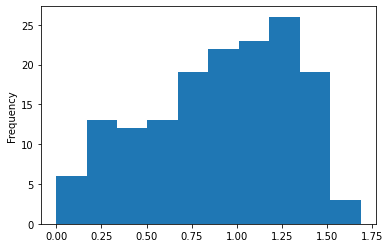

In [11]:
# Feature distribution
df['GDP per capita'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

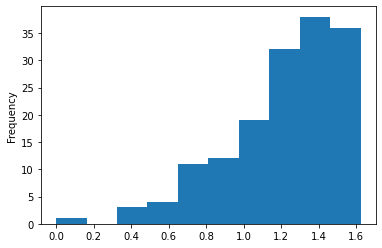

In [12]:
# Feature distribution
df['Social support'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

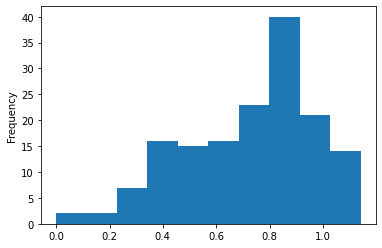

In [13]:
# Feature distribution
df['Healthy life expectancy'].plot(kind = 'hist')

# Statistics

In [14]:
# Dataset Statistics
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


# Renaming columns

In [15]:
df.columns

Index(['Overall rank', 'Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [16]:
#renaming columns
df.columns = ['Overall_rank', 'Score', 'GDP_per_capita', 'Social_support', 'Healthy_life_expectancy', 'Fr_to_make_choices', 'Generosity', 'Perceptions_of_corruption']

In [17]:
#!pip install seaborn

In [18]:
#import math
#df[['Perceptions_of_corruption']] = math.log(df[['Perceptions_of_corruption']])

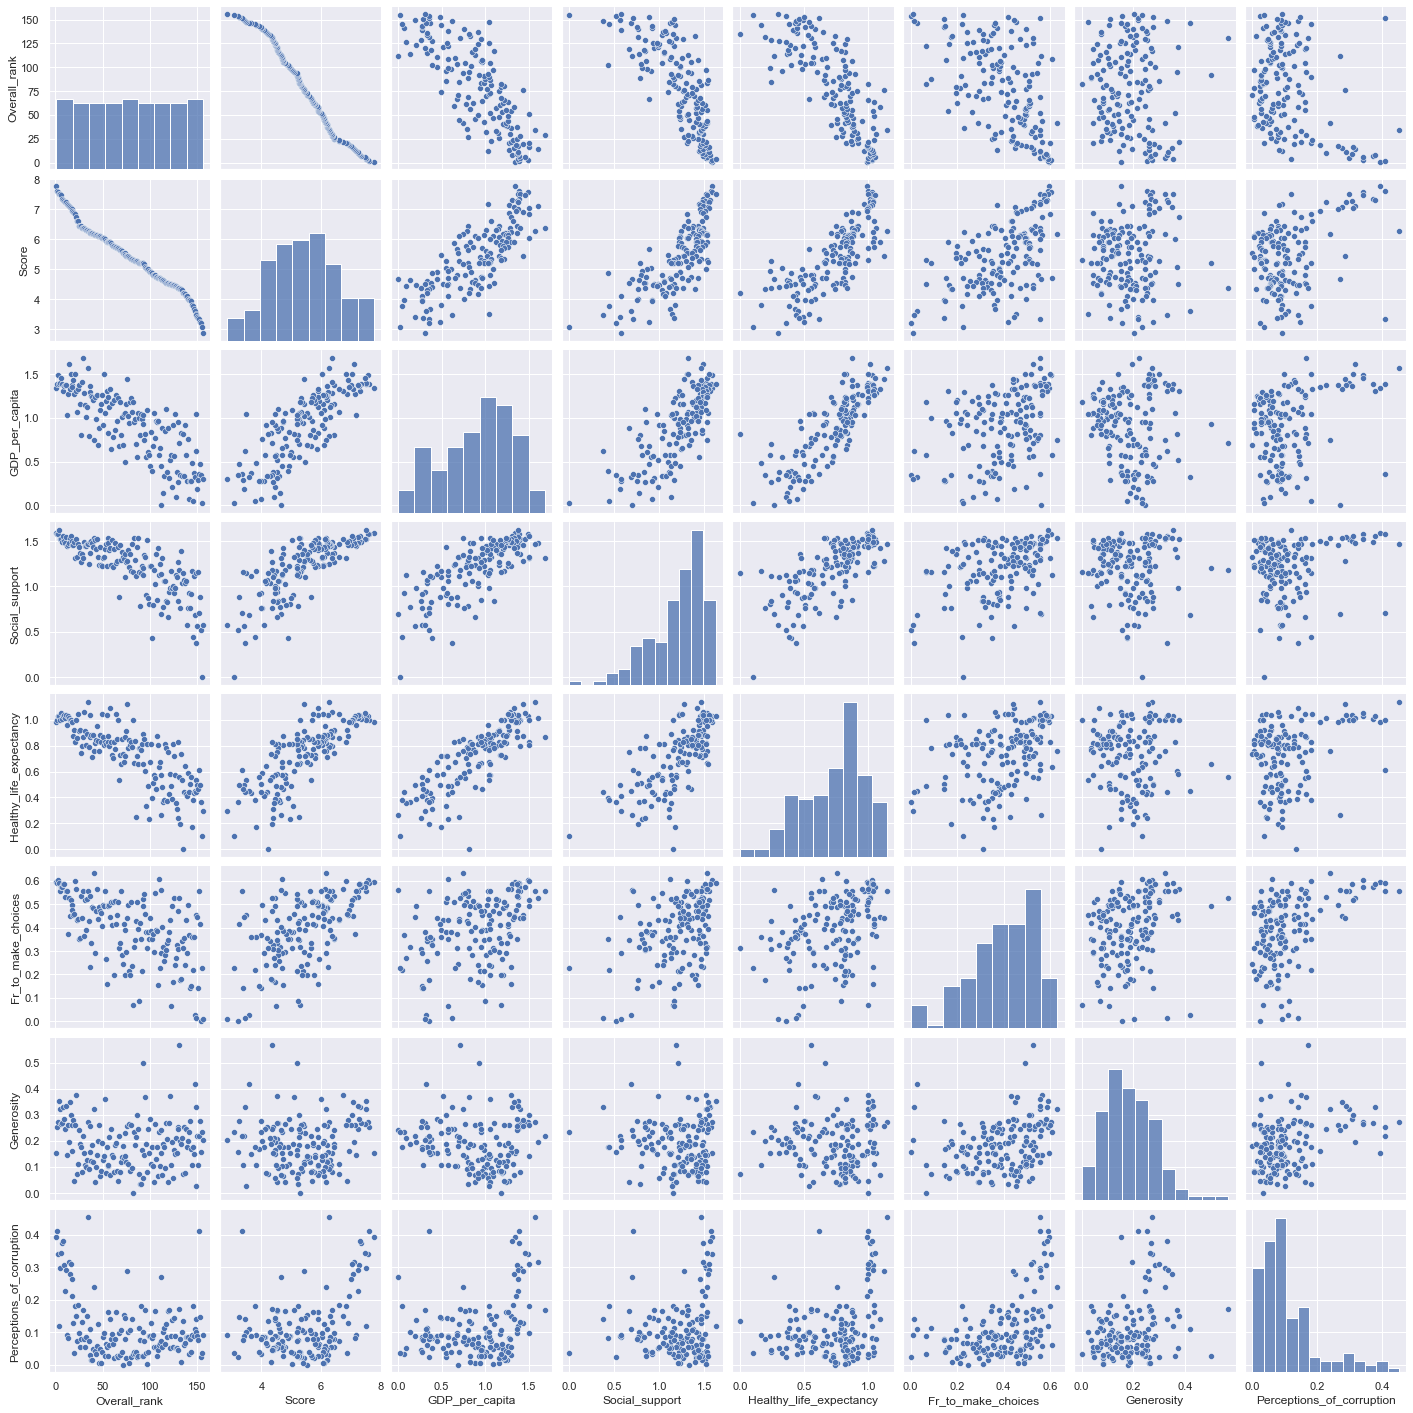

In [19]:
#df[['Perceptions_of_corruption']] = np.log(df[['Perceptions_of_corruption']])
import seaborn as sns
sns.set()
sns.pairplot(df)

# Outliers

In [20]:
dfm = df
# Outliers
Social_support = []
for Soc_support in df['Social_support']:
    if Soc_support > round(df['Social_support'].mean() + 3*df['Social_support'].std()):
        Soc_support = round(dfm['Social_support'].mean() + 3*df['Social_support'].std())
    elif Soc_support < round(df['Social_support'].mean() - 3*df['Social_support'].std()):
        Soc_support = round(dfm['Social_support'].mean() - 3*df['Social_support'].std())
    Social_support.append(Soc_support)
df['Social_support'] = Social_support

Generos = []
for Generosity in df['Generosity']:
    if Generosity > (df['Generosity'].mean() + 3*df['Generosity'].std()):
        Generosity = (dfm['Generosity'].mean() + 3*df['Generosity'].std())
    elif Generosity < (df['Generosity'].mean() - 3*df['Generosity'].std()):
        Generosity = (dfm['Generosity'].mean() - 3*df['Generosity'].std())
    Generos.append(Generosity)
df['Generosity'] = Generos

Percept_corrupt = []
for Perceptions_of_corruption in df['Perceptions_of_corruption']:
    if Perceptions_of_corruption > (df['Perceptions_of_corruption'].mean() + 3*df['Perceptions_of_corruption'].std()):
        Perceptions_of_corruption = (dfm['Perceptions_of_corruption'].mean() + 3*df['Perceptions_of_corruption'].std())
    Percept_corrupt.append(Perceptions_of_corruption)
df['Perceptions_of_corruption'] = Percept_corrupt

In [21]:
df.describe()

,Overall_rank,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Fr_to_make_choices,Generosity,Perceptions_of_corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184059,0.110017
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.092501,0.092612
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.470609,0.394216


# Correlations

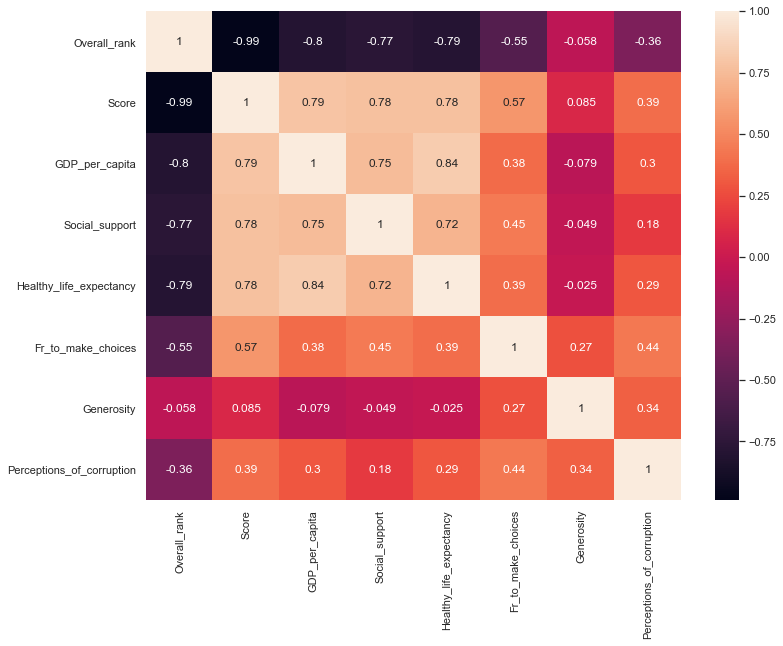

In [23]:
# Cheking correlations
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

Видим, что переменные 'Overall_rank' и 'Score' сильно коррелированы, поэтому лучше оставить одну, а именно 'Score'. С этой переменой наиболее взаимосвязаны 'GDP_per_capita	', 'Social_support' и 'Healthy_life_expectancy'.

In [24]:
# Removing Correlated Data
dfr = df.drop(['Overall_rank'], axis='columns', inplace=False)
dfr.shape

(156, 7)

# Exporting

In [25]:
# Exporting the dataset
df.to_csv('happiness.csv', sep=';', index=False)

# Linear Regression

## Splitting

In [26]:
#Splitting the dataset into the Training set and Test set
X = df.iloc[:,2:]
y = df['Score']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [27]:
X

,GDP_per_capita,Social_support,Healthy_life_expectancy,Fr_to_make_choices,Generosity,Perceptions_of_corruption
0,1.340,1.587,0.986,0.596,0.153,0.393000
1,1.383,1.573,0.996,0.592,0.252,0.394216
2,1.488,1.582,1.028,0.603,0.271,0.341000
3,1.380,1.624,1.026,0.591,0.354,0.118000
4,1.396,1.522,0.999,0.557,0.322,0.298000
...,...,...,...,...,...,...
151,0.359,0.711,0.614,0.555,0.217,0.394216
152,0.476,0.885,0.499,0.417,0.276,0.147000
153,0.350,0.517,0.361,0.000,0.158,0.025000
154,0.026,0.000,0.105,0.225,0.235,0.035000


In [28]:
# Fitting Simple Linear Regression to the Training set
f1 = ['GDP_per_capita']

from sklearn.linear_model import LinearRegression
sr = LinearRegression().fit(X_train[f1], y_train)

# Getting parameters
sr.coef_, sr.intercept_

(array([2.22802314]), 3.3677061685635272)

In [29]:
# Predicting the Test set results
y_pred = sr.predict(X_test[f1])

# Coefficient of determination R^2
sr.score(X_train[f1], y_train).round(3), sr.score(X_test[f1], y_test).round(3)

(0.629, 0.629)

63 % изменения показателя у ('Score') можно обьяснить с помощью изменения Х.  Остальные 37% случайные (другие) факторы.

In [30]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, sr.predict(X_train[f1]), squared=False).round(2), mean_squared_error(y_test, y_pred, squared=False).round(2)

(0.69, 0.63)

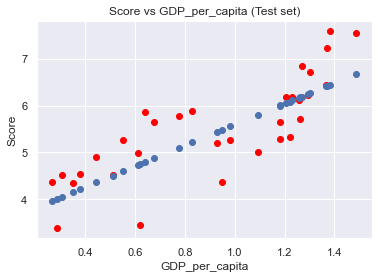

In [31]:
# Visualising the Test set results
plt.scatter(X_test['GDP_per_capita'], y_test, color = 'red')
plt.plot(X_test['GDP_per_capita'], sr.predict(X_test[f1]), 'bo')
plt.title('Score vs GDP_per_capita (Test set)')
plt.xlabel('GDP_per_capita')
plt.ylabel('Score')
plt.show()

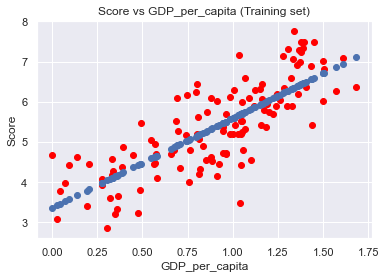

In [32]:
# Visualising the Training set results
plt.scatter(X_train['GDP_per_capita'], y_train, color = 'red')
plt.plot(X_train['GDP_per_capita'], sr.predict(X_train[f1]), 'bo')
plt.title('Score vs GDP_per_capita (Training set)')
plt.xlabel('GDP_per_capita')
plt.ylabel('Score')
plt.show()

# Multiple Linear Regression

In [33]:
#!pip install statsmodels

In [34]:
# Fitting Multiple Regression
mr = LinearRegression().fit(X_train, y_train)

# Coefficient of determination R^2
mr.score(X_train, y_train).round(3), mr.score(X_test, y_test).round(3)

(0.784, 0.748)

Коэф. детерминации достаточно высокий (78,4 % на обуч. множестве и 74,8 % на тест. мн-стве)

In [36]:
# Checking p-values
import statsmodels.api as sm
X1 = sm.add_constant(X_train)
mr1 = sm.OLS(y_train, X1).fit()
mr1.pvalues

const                        7.100482e-10
GDP_per_capita               7.638762e-03
Social_support               1.106688e-05
Healthy_life_expectancy      4.082001e-04
Fr_to_make_choices           6.602764e-04
Generosity                   1.878240e-01
Perceptions_of_corruption    4.366754e-01
dtype: float64

 Согласно Р-знач. параметры 'const', 'GDP_per_capita', 'Social_support', 'Healthy_life_expectancy', 'Fr_to_make_choices' статистически значимы, a 'Generosity' и 'Perceptions_of_corruption' не значимы.

In [37]:
mr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     70.71
Date:                Tue, 26 Oct 2021   Prob (F-statistic):           1.35e-36
Time:                        14:02:34   Log-Likelihood:                -95.584
No. Observations:                 124   AIC:                             205.2
Df Residuals:                     117   BIC:                             224.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         1.6085      0.239      6.716      0.000       1.134       2.083
GDP_per_capita                0.6680      0.246      2.715      0.008       0.181       1.155
Social_support                1.1965      0.260      4.594      0.000       0.681       1.712
Healthy_life_expectancy       1.3197      0.363      3.639      0.000       0.602       2.038
Fr_to_make_choices            1.4756      0.422      3.500      0.001       0.641       2.311
Generosity                    0.8145      0.615      1.325      0.188      -0.403       2.032
Perceptions_of_corruption     0.5118      0.656      0.780      0.437      -0.787       1.810
==============================================================================
Omnibus:                        3.977   Durbin-Watson:                   2.414
Prob(Omnibus):                  0.137   Jarque-Bera (JB):                3.439
Skew:                          -0.387   Prob(JB):                        0.179
Kurtosis:                       3.260   Cond. No.                         31.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Модель адекватна

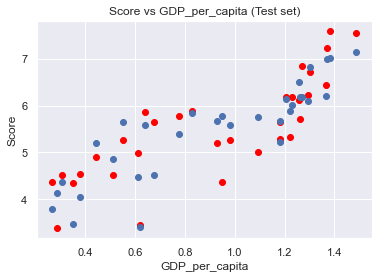

In [35]:
# Visualising the Test set results
plt.scatter(X_test['GDP_per_capita'], y_test, color = 'red')
plt.plot(X_test['GDP_per_capita'], mr.predict(X_test), 'bo')
plt.title('Score vs GDP_per_capita (Test set)')
plt.xlabel('GDP_per_capita')
plt.ylabel('Score')
plt.show()

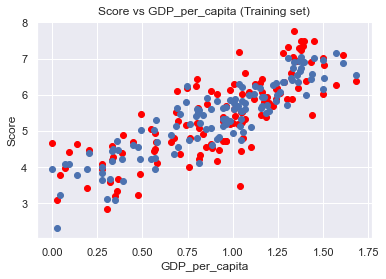

In [38]:
# Visualising the Training set results
plt.scatter(X_train['GDP_per_capita'], y_train, color = 'red')
plt.plot(X_train['GDP_per_capita'], mr.predict(X_train), 'bo')
plt.title('Score vs GDP_per_capita (Training set)')
plt.xlabel('GDP_per_capita')
plt.ylabel('Score')
plt.show()

Данная модель гораздо лучше описывает динамику показателя 'Score' (нежели однофакторная модель)

# Polynomial Regression

In [39]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
X_train_p = PolynomialFeatures().fit_transform(X_train[f1])
X_test_p = PolynomialFeatures().fit_transform(X_test[f1])

pr = LinearRegression().fit(X_train_p[:,2:], y_train)

# Getting parameters
pr.coef_, pr.intercept_

(array([1.31171599]), 4.099693327565024)

In [40]:
# Predicting the Test set results
y_pred = pr.predict(X_test_p[:,2:])

# Coefficient of determination R^2
pr.score(X_train_p[:,2:], y_train).round(3), pr.score(X_test_p[:,2:], y_test).round(3)

(0.631, 0.652)

Показатели коэф. дет. лучше, чем в лин. регрессии, но хуже, чем в многофакторной.

In [41]:
# Mean squared error
mean_squared_error(y_train, pr.predict(X_train_p[:,2:]), squared=False).round(2), mean_squared_error(y_test, y_pred, squared=False).round(2)

(0.68, 0.61)

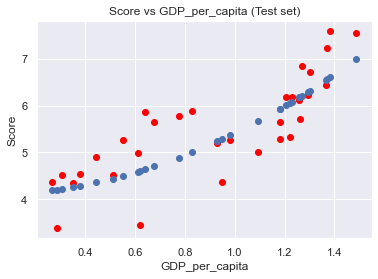

In [42]:
# Visualising the Test set results
plt.scatter(X_test['GDP_per_capita'], y_test, color = 'red')
plt.plot(X_test['GDP_per_capita'], pr.predict(X_test_p[:,2:]), 'bo')
plt.title('Score vs GDP_per_capita (Test set)')
plt.xlabel('GDP_per_capita')
plt.ylabel('Score')
plt.show()

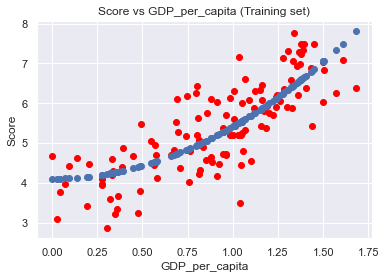

In [43]:
# Visualising the Training set results
plt.scatter(X_train['GDP_per_capita'], y_train, color = 'red')
plt.plot(X_train['GDP_per_capita'], pr.predict(X_train_p[:,2:]), 'bo')
plt.title('Score vs GDP_per_capita (Training set)')
plt.xlabel('GDP_per_capita')
plt.ylabel('Score')
plt.show()

# Backward Elimination

In [44]:
# Backward Elimination with p-values
def backwardElimination(x, y, sl):
    x = sm.add_constant(x)
    numVars = x.shape[1]
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j] == maxVar):
                    x = x.drop(x.columns[j], axis=1)
    regressor_OLS.summary()
    return x

SL = 0.0001
X_Modeled = backwardElimination(X_train, y_train, SL)

In [45]:
# Fitting Optimized Multiple Regression
mr_be = LinearRegression().fit(X_Modeled, y_train)

In [46]:
# Getting parameters
mr_be.coef_, mr_be.intercept_

(array([0.        , 1.46073624, 1.98956843, 1.82699803]), 1.4760413801960999)

In [47]:
# Predicting the Test set results
y_pred = mr_be.predict(X_Modeled)

In [48]:
# Coefficient of determination R^2
mr_be.score(X_Modeled, y_train).round(3)

0.764

Коэф. дет. немного меньше, чем в многофакторной регресии, но больше, чем в остальных рассмотренных ранее моделях.

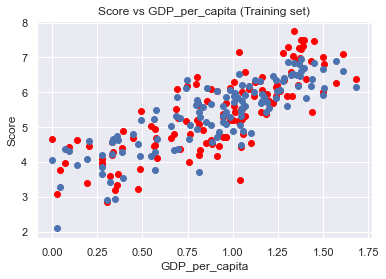

In [49]:
# Visualising the Training set results
plt.scatter(X_train['GDP_per_capita'], y_train, color = 'red')
plt.plot(X_train['GDP_per_capita'], mr_be.predict(X_Modeled), 'bo')
plt.title('Score vs GDP_per_capita (Training set)')
plt.xlabel('GDP_per_capita')
plt.ylabel('Score')
plt.show()

# Pickle

In [50]:
import pickle
obj = {'X_train': X_train, 'X_test': X_test,'y_train': y_train,'y_test': y_test}
output = open('data_reg.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()

# Non-linear Regression

In [51]:
input = open('data_reg.pkl', 'rb')
obj = pickle.load(input)
input.close()
X_train = obj["X_train"]
X_test = obj["X_test"]
y_train = obj["y_train"]
y_test = obj["y_test"]

f = ['GDP_per_capita', 'Social_support']

In [52]:
# Metrics
def metrics(X_train, X_test, y_train, y_test, y_pred, model):
    RMSE = [mean_squared_error(y_train, model.predict(X_train),squared=False), mean_squared_error(y_test, y_pred, squared=False)]
    R2 = [model.score(X_train, y_train), model.score(X_test, y_test)]
    results = {'RMSE': RMSE, 'R2':R2}
    return pd.DataFrame(results, index=['Train', 'Test'])

# Regression Tree

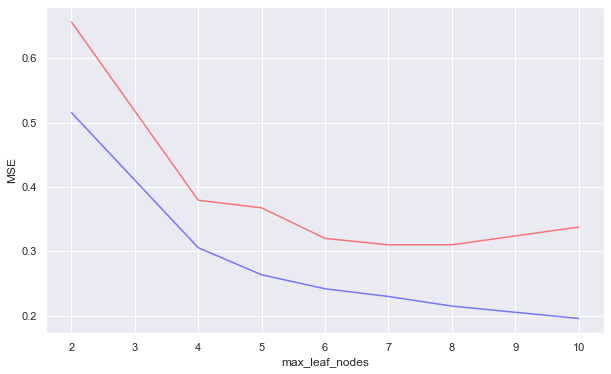

In [53]:
def max_leaf_nodes(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        dt = DecisionTreeRegressor(max_leaf_nodes = i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, dt.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, dt.predict(X_test)))
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")
    
# The optimal number of max_leaf_nodes
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
max_leaf_nodes(X_train[f], X_test[f], y_train, y_test, [2, 4, 5, 6, 7, 8, 10]) 

In [54]:
# Fitting Tree to the Training set
dt = DecisionTreeRegressor(max_leaf_nodes = 7).fit(X_train[f], y_train)

# Predicting the Test set results
dt_y_pred = dt.predict(X_test[f])

# Metrics
metrics(X_train[f], X_test[f], y_train, y_test, dt_y_pred, dt).round(2)

,RMSE,R2
Train,0.48,0.82
Test,0.56,0.71


Модель обуч. выборки лучше, чем тестовой

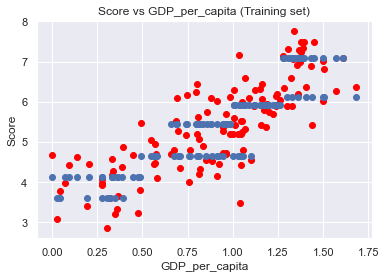

In [55]:
# Visualising the Training set results
plt.scatter(X_train['GDP_per_capita'], y_train, color = 'red')
plt.plot(X_train['GDP_per_capita'], dt.predict(X_train[f]), 'bo')
plt.title('Score vs GDP_per_capita (Training set)')
plt.xlabel('GDP_per_capita')
plt.ylabel('Score')
plt.show()

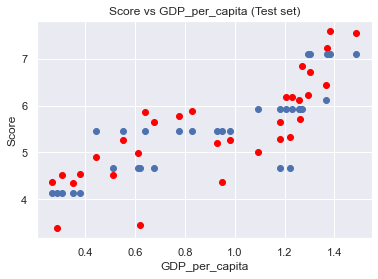

In [56]:
# Visualising the Test set results
plt.scatter(X_test['GDP_per_capita'], y_test, color = 'red')
plt.plot(X_test['GDP_per_capita'], dt.predict(X_test[f]), 'bo')
plt.title('Score vs GDP_per_capita (Test set)')
plt.xlabel('GDP_per_capita')
plt.ylabel('Score')
plt.show()

Text(0.5, 1.0, 'Tree. Feature Importance')

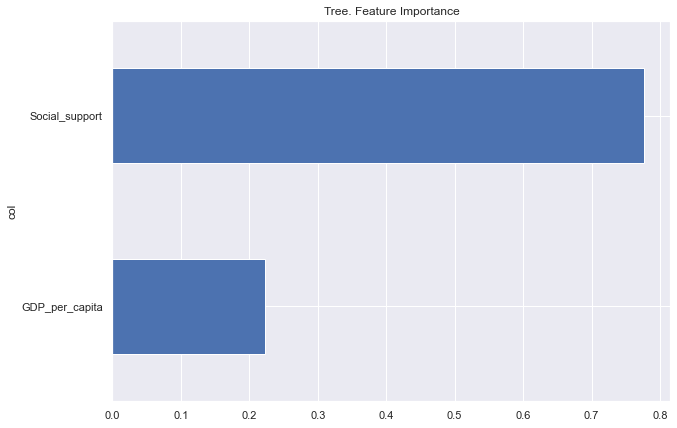

In [57]:
# Features importances
dt_imp = pd.DataFrame({'imp': dt.feature_importances_, 'col': X_train[f].columns})
dt_imp = dt_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-10:]
dt_imp.plot(kind='barh', x='col', y='imp', figsize=(10, 7), legend=None)
plt.title('Tree. Feature Importance')

На данную модель существенно влияют показатели 'Social_support' и в меньшей мере 'GDP_per_capita'.

# Random Forest

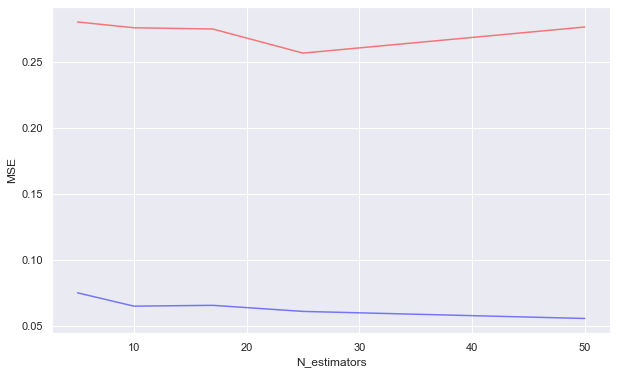

In [58]:
def rf_best_n_estimator(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = RandomForestRegressor(n_estimators=i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test)))
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("N_estimators")
    
# The optimal number of trees 
from sklearn.ensemble import RandomForestRegressor    
rf_best_n_estimator(X_train[f], X_test[f], y_train, y_test, [5, 10, 17, 25, 50])

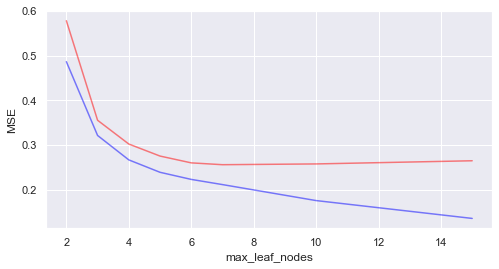

In [64]:
def rf_max_leaf_nodes(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = RandomForestRegressor(n_estimators=25, max_leaf_nodes =i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")
    
# The optimal number of max_leaf_nodes
rf_max_leaf_nodes(X_train[f], X_test[f], y_train, y_test, [2, 3, 4, 5, 6, 7, 10, 15 ])

In [69]:
# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 25, max_leaf_nodes = 8, random_state = 10).fit(X_train[f], y_train)

# Predicting the Test set results
rf_y_pred = rf.predict(X_test[f])

# Metrics
metrics(X_train[f], X_test[f], y_train, y_test, rf_y_pred, rf).round(2)

,RMSE,R2
Train,0.44,0.84
Test,0.50,0.77


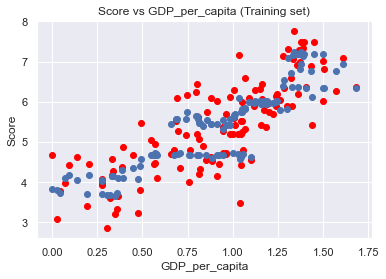

In [70]:
# Visualising the Training set results
plt.scatter(X_train['GDP_per_capita'], y_train, color = 'red')
plt.plot(X_train['GDP_per_capita'], rf.predict(X_train[f]), 'bo')
plt.title('Score vs GDP_per_capita (Training set)')
plt.xlabel('GDP_per_capita')
plt.ylabel('Score')
plt.show()

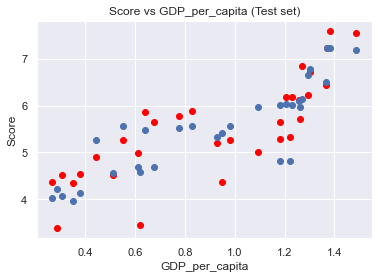

In [71]:
# Visualising the Test set results
plt.scatter(X_test['GDP_per_capita'], y_test, color = 'red')
plt.plot(X_test['GDP_per_capita'], rf.predict(X_test[f]), 'bo')
plt.title('Score vs GDP_per_capita (Test set)')
plt.xlabel('GDP_per_capita')
plt.ylabel('Score')
plt.show()

Text(0.5, 1.0, 'Random Forest. Feature Importance')

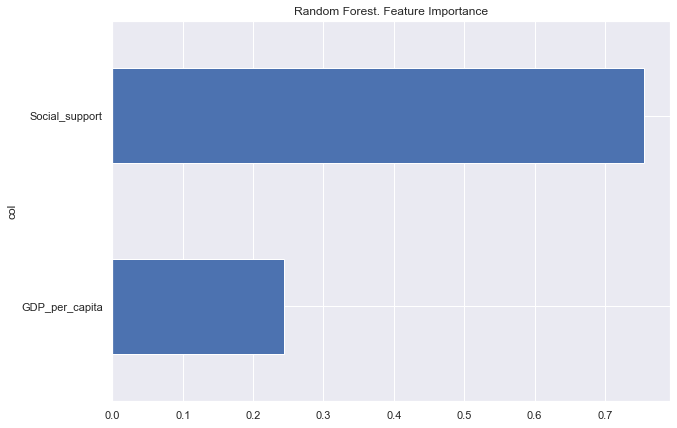

In [73]:
# Features importances
rf_imp = pd.DataFrame({'imp': rf.feature_importances_, 'col': X_train[f].columns})
rf_imp = rf_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-20:]
rf_imp.plot(kind='barh', x='col', y='imp', figsize=(10, 7), legend=None)
plt.title('Random Forest. Feature Importance')

Вывод: Уровень счастья лучше всего описывается моделью 'Random Forest', на нее существенно влияют показатели параметра 'Social_support' и в меньшей степени 'GDP_per_capita'. 